In [2]:
import torch 
import matplotlib.pyplot as plt 

In [3]:
def smooth_the_data(ax, x, y, smoothing_factor=100, color='blue', label=None):
    y = torch.tensor(y, dtype=torch.float)
    segments = y.unfold(0, size=smoothing_factor, step=1)
    
    mid = segments.mean(dim=-1)
    #mx = segments.topk(smoothing_factor//5, dim=-1).values.mean()
    #mn = segments.topk(smoothing_factor//5, largest=False, dim=-1).values.mean()
    std = segments.std(dim=-1)/2

    #plt.plot(epochs, reward, color=color, alpha=0.2)
    x = x[:-smoothing_factor+1]
    
    ax.plot(x, mid, color=color, label=label)
    ax.fill_between(x=x, y1=mid+std, y2=mid-std, color=color, alpha=0.2)
    #plt.fill_between(x=x, y1=mx, y2=mn, color=color, alpha=0.2)

def plot_episode(n,seed, smoothing_factor=100, dir=''):
    data = torch.load(f'../logs/{dir}{n}N_{seed}.pt')
    r = data['rews']; l = data['lens']

    step = [0]
    for s in l: 
        step.append(step[-1] + s)
    step = step[1:]

    fig,axes = plt.subplots(ncols=2)
    fig.set_figheight(7)
    fig.set_figwidth(20)

    smooth_the_data(axes[0], step, r, smoothing_factor=smoothing_factor)
    axes[0].set_title("Reward")

    smooth_the_data(axes[1], step, l, color='red', smoothing_factor=smoothing_factor)
    axes[1].set_title("Episode Length")
    
    plt.show()

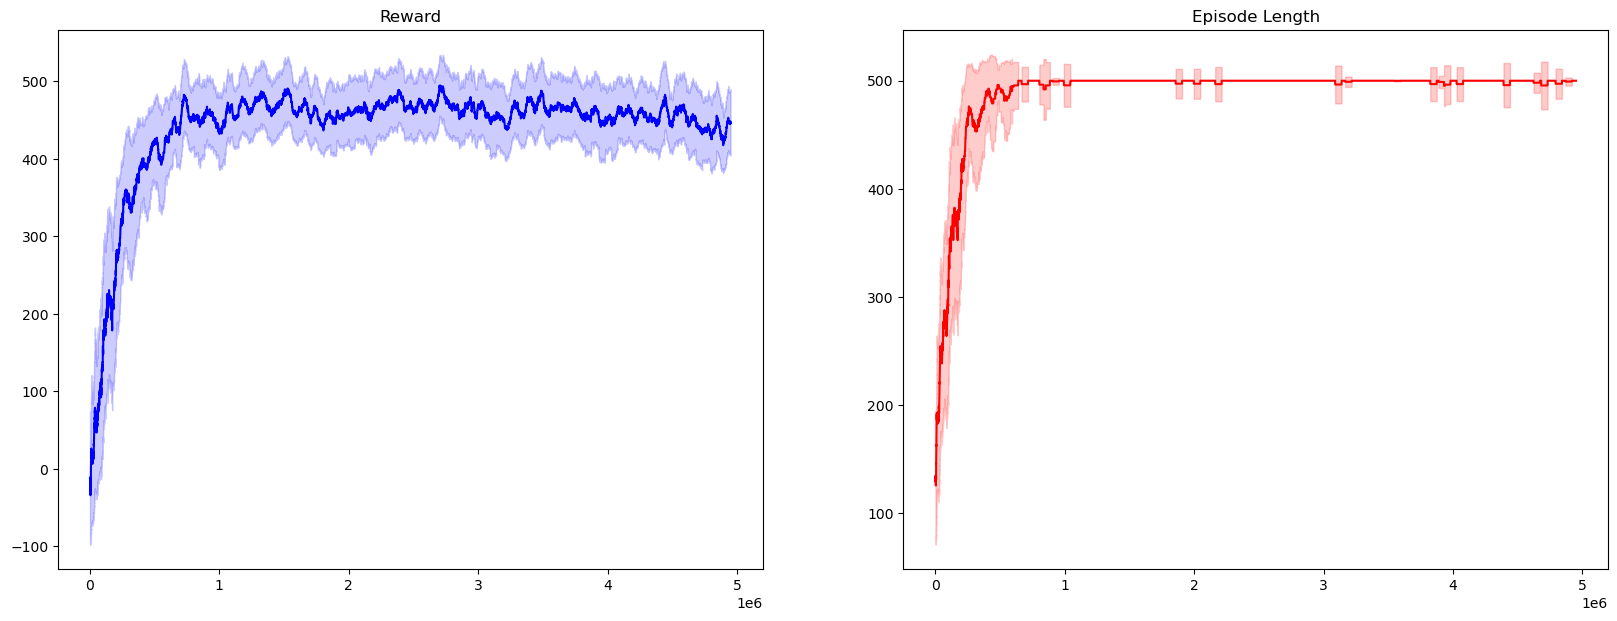

In [4]:
plot_episode(10,0, smoothing_factor=100)

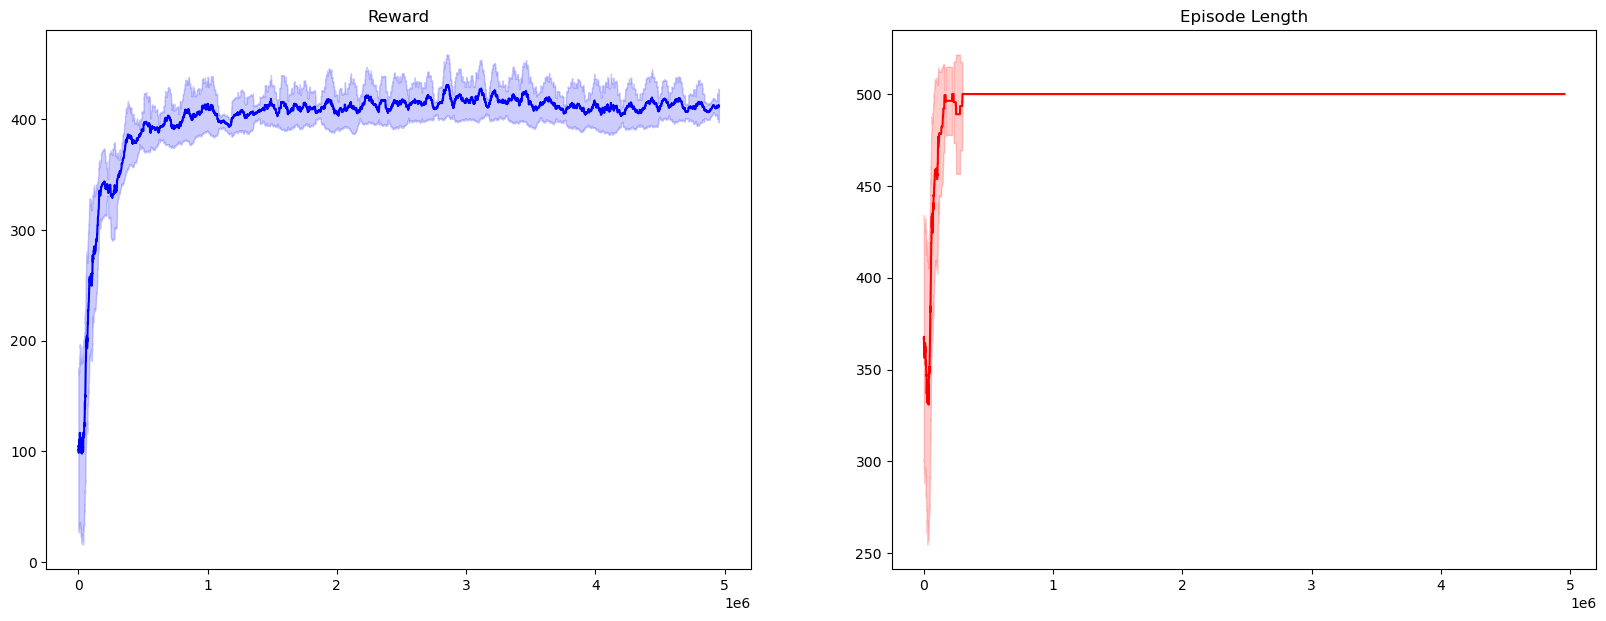

In [5]:
plot_episode(20,0)

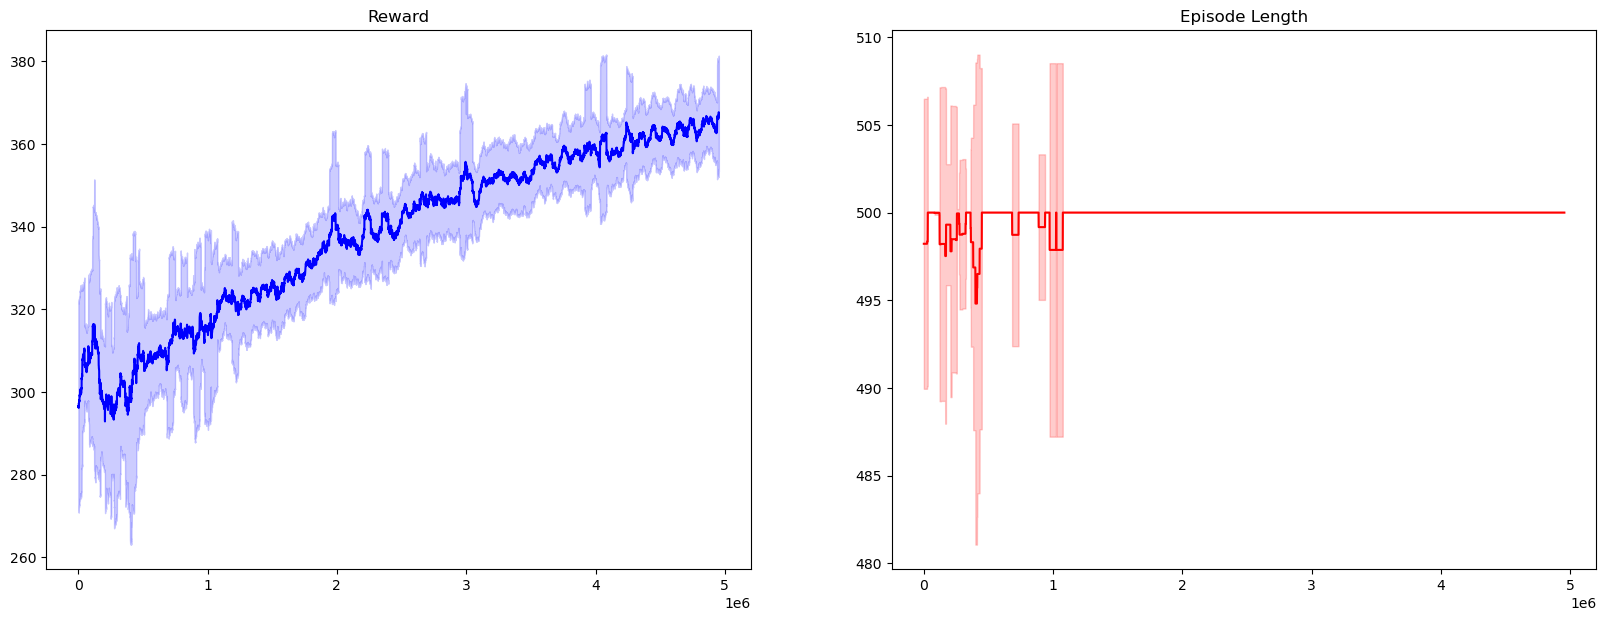

In [6]:
plot_episode(40,0)